In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("DataCenter_Dataset.csv")
df.head(5)

,country,total_data_centers,hyperscale_data_centers,colocation_data_centers,floor_space_sqft_total,power_capacity_MW_total,average_renewable_energy_usage_percent,tier_distribution,key_operators,cloud_provider,...,avg_latency_to_global_hubs_ms,number_of_fiber_connections,growth_rate_of_data_centers_percent_per_year,cooling_technologies_common,regulatory_challenges_or_limits,disaster_recovery_sites_common,green_dc_initiatives_description,source_of_data,Unnamed: 19,Unnamed: 20
0,United States,5426,300+,"~2,000+","~3,552,000,000","~12,000+",~27%,"I:5%, II:15%, III:60%, IV:20%","Equinix, Digital Realty, CoreSite, AWS","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",...,40,60+,12%,"Air, Liquid, Immersion","Power grid strain in VA, moratoriums in some s...","Yes, especially for finance/health","Solar, wind PPA, immersion cooling, LEED","Statista, Brightlio, IEA, CBRE",NaN,NaN
1,Germany,529,50,~200,"~350,000,000","~2,000+",40%+,"II:10%, III:70%, IV:20%","Equinix, Digital Realty, e-shelter","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",...,50,30+,8%,"Air, Indirect Evap.","Power caps in Frankfurt, strict emissions","Yes, especially for finance","Wind, solar, carbon-neutral push","Statista, CBRE, IEA",NaN,NaN
2,United Kingdom,523,30,~150,"~200,000,000","~1,000+",0.45,"II:15%, III:70%, IV:15%","Equinix, Telehouse, Virtus","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",...,40,25+,7%,"Air, Free Cooling",Power grid constraints in London,"Yes, especially for finance","Wind, solar, carbon-neutral targets","Statista, CBRE, IEA",NaN,NaN
3,China,449,100,"~1,000+","~500,000,000","~8,000+",0.25,"II:20%, III:60%, IV:20%","China Unicom, Tencent, Alibaba, GDS","AWS:Yes, GCP:No, Azure:Yes, Oracle:Yes",...,75,40+,15%,"Air, Liquid",Power rationing in some provinces,"Yes, for government/finance","Hydro, wind, solar, green finance","Statista, CBRE, IEA",NaN,NaN
4,France,322,20,~110,"~120,000,000",~700,40%+,"II:20%, III:70%, IV:10%","Equinix, Interxion, Data4","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",...,50,20+,6%,"Air, Liquid",Power grid constraints in Paris,"Yes, for finance/health","Wind, solar, PUE targets","Statista, CBRE, IEA",NaN,NaN


In [4]:
df.isnull().sum()

country                                           0
total_data_centers                                0
hyperscale_data_centers                           0
colocation_data_centers                           0
floor_space_sqft_total                            0
power_capacity_MW_total                           0
average_renewable_energy_usage_percent            0
tier_distribution                                 0
key_operators                                    10
cloud_provider                                    0
internet_penetration_percent                      0
avg_latency_to_global_hubs_ms                     0
number_of_fiber_connections                       0
growth_rate_of_data_centers_percent_per_year      2
cooling_technologies_common                       1
regulatory_challenges_or_limits                   0
disaster_recovery_sites_common                    1
green_dc_initiatives_description                 14
source_of_data                                    4
Unnamed: 19 

In [5]:
df.drop(['Unnamed: 19','Unnamed: 20'],axis=1,inplace=True)
df.drop(['source_of_data'],axis=1,inplace=True)


In [6]:
df.head()

,country,total_data_centers,hyperscale_data_centers,colocation_data_centers,floor_space_sqft_total,power_capacity_MW_total,average_renewable_energy_usage_percent,tier_distribution,key_operators,cloud_provider,internet_penetration_percent,avg_latency_to_global_hubs_ms,number_of_fiber_connections,growth_rate_of_data_centers_percent_per_year,cooling_technologies_common,regulatory_challenges_or_limits,disaster_recovery_sites_common,green_dc_initiatives_description
0,United States,5426,300+,"~2,000+","~3,552,000,000","~12,000+",~27%,"I:5%, II:15%, III:60%, IV:20%","Equinix, Digital Realty, CoreSite, AWS","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",92%,40,60+,12%,"Air, Liquid, Immersion","Power grid strain in VA, moratoriums in some s...","Yes, especially for finance/health","Solar, wind PPA, immersion cooling, LEED"
1,Germany,529,50,~200,"~350,000,000","~2,000+",40%+,"II:10%, III:70%, IV:20%","Equinix, Digital Realty, e-shelter","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",92%,50,30+,8%,"Air, Indirect Evap.","Power caps in Frankfurt, strict emissions","Yes, especially for finance","Wind, solar, carbon-neutral push"
2,United Kingdom,523,30,~150,"~200,000,000","~1,000+",0.45,"II:15%, III:70%, IV:15%","Equinix, Telehouse, Virtus","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",96%,40,25+,7%,"Air, Free Cooling",Power grid constraints in London,"Yes, especially for finance","Wind, solar, carbon-neutral targets"
3,China,449,100,"~1,000+","~500,000,000","~8,000+",0.25,"II:20%, III:60%, IV:20%","China Unicom, Tencent, Alibaba, GDS","AWS:Yes, GCP:No, Azure:Yes, Oracle:Yes",76%,75,40+,15%,"Air, Liquid",Power rationing in some provinces,"Yes, for government/finance","Hydro, wind, solar, green finance"
4,France,322,20,~110,"~120,000,000",~700,40%+,"II:20%, III:70%, IV:10%","Equinix, Interxion, Data4","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",91%,50,20+,6%,"Air, Liquid",Power grid constraints in Paris,"Yes, for finance/health","Wind, solar, PUE targets"


In [7]:
df.shape

(191, 18)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   country                                       191 non-null    object
 1   total_data_centers                            191 non-null    int64 
 2   hyperscale_data_centers                       191 non-null    object
 3   colocation_data_centers                       191 non-null    object
 4   floor_space_sqft_total                        191 non-null    object
 5   power_capacity_MW_total                       191 non-null    object
 6   average_renewable_energy_usage_percent        191 non-null    object
 7   tier_distribution                             191 non-null    object
 8   key_operators                                 181 non-null    object
 9   cloud_provider                                191 non-null    object
 10  in

In [9]:
print('Columns in the dataframe:', df.columns.tolist())

Columns in the dataframe: ['country', 'total_data_centers', 'hyperscale_data_centers', 'colocation_data_centers', 'floor_space_sqft_total', 'power_capacity_MW_total', 'average_renewable_energy_usage_percent', 'tier_distribution', 'key_operators', 'cloud_provider', 'internet_penetration_percent', 'avg_latency_to_global_hubs_ms', 'number_of_fiber_connections', 'growth_rate_of_data_centers_percent_per_year', 'cooling_technologies_common', 'regulatory_challenges_or_limits', 'disaster_recovery_sites_common', 'green_dc_initiatives_description']


In [10]:
def numeric_column(series):
    series = series.replace({'%': '', ',': '', '\$': '', '~': '', '\+': ''},regex=True)
    return pd.to_numeric(series, errors='coerce')

column=['average_renewable_energy_usage_percent','internet_penetration_percent','avg_latency_to_global_hubs_ms','number_of_fiber_connections','growth_rate_of_data_centers_percent_per_year']

df['floor_space_sqft_total'] = df['floor_space_sqft_total'].str.replace('~', '',regex=False).str.replace('+', '',regex=False).str.replace(',','',regex=False)
df['floor_space_sqft_total'] = df['floor_space_sqft_total'].replace(['unknown', 'Unknown', 'unk','?', ''], np.nan)
df['floor_space_sqft_total'] = df['floor_space_sqft_total'].str.strip()
df['power_capacity_MW_total'] = df['power_capacity_MW_total'].str.replace('~','',regex=False).str.replace('+','~',regex=False).str.replace(',','',regex=False)
df['power_capacity_MW_total'] = df['power_capacity_MW_total'].replace(['unknown', 'Unknown', 'unk','?', ''], np.nan)
df['power_capacity_MW_total'] = df['power_capacity_MW_total'].str.strip()

for col in column:
    if col in df.columns:
        df[col]=numeric_column(df[col])
    else:
        print(f"Column {col} not found in the DataFrame")
        







In [11]:
df['power_capacity_MW_total']=df['power_capacity_MW_total'].str.replace('~','',regex=False).str.replace(',','',regex=False)
df['power_capacity_MW_total'] = df['power_capacity_MW_total'].replace(['unknown', 'Unknown', 'unk','?', ''], np.nan)
df['power_capacity_MW_total'] = df['power_capacity_MW_total'].str.strip()

In [12]:
df['hyperscale_data_centers']=df['hyperscale_data_centers'].str.replace('~','',regex=False).str.replace('+','',regex=False).str.replace(',','',regex=False)
df['hyperscale_data_centers'] = df['hyperscale_data_centers'].replace(['unknown', 'Unknown', 'unk','?', ''], np.nan)
df['colocation_data_centers']=df['colocation_data_centers'].str.replace('~','',regex=False).str.replace('+','',regex=False).str.replace(',','',regex=False)
df['colocation_data_centers'] = df['colocation_data_centers'].replace(['unknown', 'Unknown', 'unk','?', ''], np.nan)
df['hyperscale_data_centers'] = df['hyperscale_data_centers'].astype(float)
df['colocation_data_centers'] = df['colocation_data_centers'].astype(float)
df['power_capacity_MW_total'] = df['power_capacity_MW_total'].astype('Int64')

In [13]:
def convert_range_to_average(value):
    value = str(value)
    if '-' in value:
        try:
            parts = value.split('-')
            min_val = float(parts[0])
            max_val = float(parts[1])
            return (min_val + max_val) / 2  # Average
        except:
            return np.nan
    else:
        try:
            return float(value)
        except:
            return np.nan

df['floor_space_sqft_total'] = df['floor_space_sqft_total'].apply(convert_range_to_average)
df['floor_space_sqft_total'] = df['floor_space_sqft_total'].astype('Int64')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   country                                       191 non-null    object 
 1   total_data_centers                            191 non-null    int64  
 2   hyperscale_data_centers                       191 non-null    float64
 3   colocation_data_centers                       191 non-null    float64
 4   floor_space_sqft_total                        184 non-null    Int64  
 5   power_capacity_MW_total                       165 non-null    Int64  
 6   average_renewable_energy_usage_percent        144 non-null    float64
 7   tier_distribution                             191 non-null    object 
 8   key_operators                                 181 non-null    object 
 9   cloud_provider                                191 non-null    obj

In [15]:
df.head(10)

,country,total_data_centers,hyperscale_data_centers,colocation_data_centers,floor_space_sqft_total,power_capacity_MW_total,average_renewable_energy_usage_percent,tier_distribution,key_operators,cloud_provider,internet_penetration_percent,avg_latency_to_global_hubs_ms,number_of_fiber_connections,growth_rate_of_data_centers_percent_per_year,cooling_technologies_common,regulatory_challenges_or_limits,disaster_recovery_sites_common,green_dc_initiatives_description
0,United States,5426,300.0,2000.0,3552000000,12000,27.00,"I:5%, II:15%, III:60%, IV:20%","Equinix, Digital Realty, CoreSite, AWS","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",92.0,40.0,60.0,12.0,"Air, Liquid, Immersion","Power grid strain in VA, moratoriums in some s...","Yes, especially for finance/health","Solar, wind PPA, immersion cooling, LEED"
1,Germany,529,50.0,200.0,350000000,2000,40.00,"II:10%, III:70%, IV:20%","Equinix, Digital Realty, e-shelter","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",92.0,50.0,30.0,8.0,"Air, Indirect Evap.","Power caps in Frankfurt, strict emissions","Yes, especially for finance","Wind, solar, carbon-neutral push"
2,United Kingdom,523,30.0,150.0,200000000,1000,0.45,"II:15%, III:70%, IV:15%","Equinix, Telehouse, Virtus","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",96.0,40.0,25.0,7.0,"Air, Free Cooling",Power grid constraints in London,"Yes, especially for finance","Wind, solar, carbon-neutral targets"
3,China,449,100.0,1000.0,500000000,8000,0.25,"II:20%, III:60%, IV:20%","China Unicom, Tencent, Alibaba, GDS","AWS:Yes, GCP:No, Azure:Yes, Oracle:Yes",76.0,75.0,40.0,15.0,"Air, Liquid",Power rationing in some provinces,"Yes, for government/finance","Hydro, wind, solar, green finance"
4,France,322,20.0,110.0,120000000,700,40.00,"II:20%, III:70%, IV:10%","Equinix, Interxion, Data4","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",91.0,50.0,20.0,6.0,"Air, Liquid",Power grid constraints in Paris,"Yes, for finance/health","Wind, solar, PUE targets"
5,Canada,336,15.0,100.0,90000000,500,0.78,"II:20%, III:70%, IV:10%","Equinix, Cologix, eStruxture","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",96.0,75.0,18.0,9.0,"Air, Liquid, Free Cooling",Power grid constraints in Toronto/Vancouver,"Yes, especially for finance/health","Hydro, wind, carbon-neutral push"
6,Australia,314,20.0,80.0,40000000,1200,0.30,"II:20%, III:70%, IV:10%","NEXTDC, Equinix, AirTrunk","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",96.0,55.0,20.0,10.0,"Air, Liquid, Free Cooling",Power grid constraints in Sydney,"Yes, for finance/tech","Solar, wind, carbon-neutral push"
7,Netherlands,298,15.0,90.0,35000000,700,0.90,"II:10%, III:80%, IV:10%","Equinix, Interxion, NorthC","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",96.0,50.0,14.0,8.0,"Air, Liquid, Free Cooling",Moratorium in Amsterdam (lifted 2021),"Yes, especially for finance/tech","Wind, solar, green PUE targets"
8,Russia,251,10.0,60.0,20000000,400,0.15,"II:30%, III:60%, IV:10%","IXcellerate, DataPro, Rostelecom","AWS:No, GCP:No, Azure:No, Oracle:No",85.0,100.0,10.0,6.0,"Air, Liquid","Data localization, import restrictions","Yes, for government/finance","Some wind/solar pilots, limited scale"
9,Japan,222,20.0,80.0,50000000,1000,0.25,"II:20%, III:70%, IV:10%","Equinix, NTT, KDDI, Colt","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",94.0,60.0,16.0,7.0,"Air, Liquid, Immersion",Power grid constraints in Tokyo/Osaka,"Yes, for finance/tech","Solar, wind, green building codes"


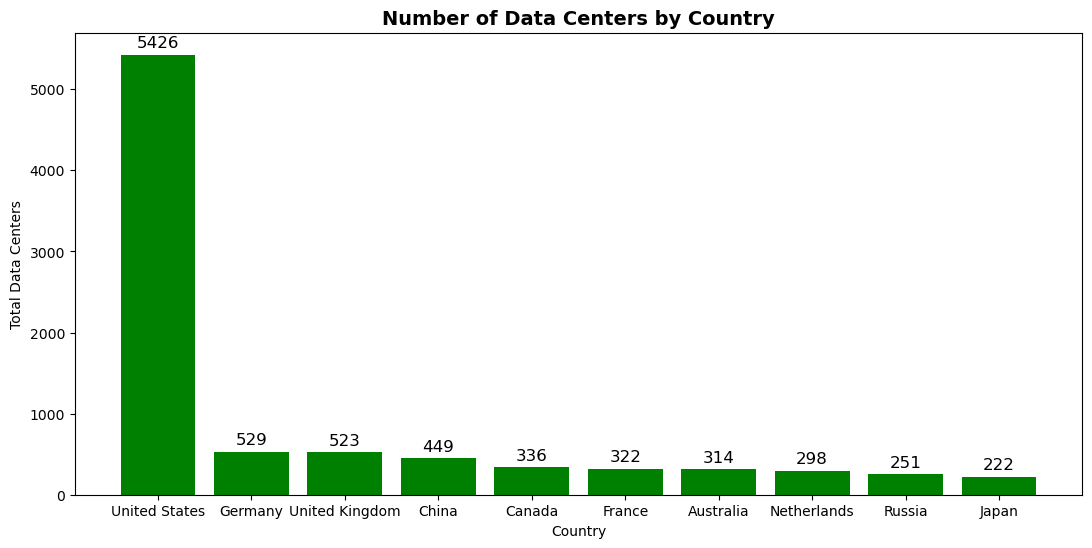

In [16]:
top_countries = df.sort_values(by='total_data_centers', ascending=False).head(10)
plt.figure(figsize=(13,6))
bars=plt.bar(top_countries['country'], top_countries['total_data_centers'], color='green')
for bar in bars:
    val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, val + 50, int(val), 
             ha='center', va='bottom', fontsize=12)
plt.xlabel("Country")
plt.ylabel("Total Data Centers")
plt.title('Number of Data Centers by Country', fontsize=14, fontweight='bold')


plt.show()

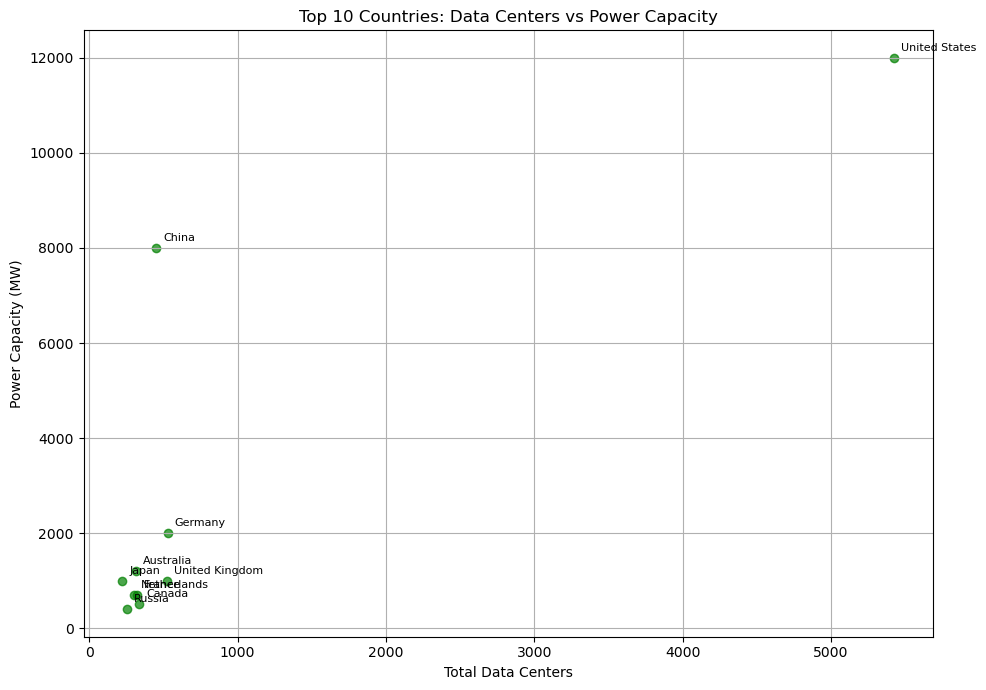

In [ ]:
correlation_data = df[['total_data_centers', 'power_capacity_MW_total', 'country']].dropna()

top_10_by_centers = correlation_data.nlargest(10, 'total_data_centers')

correlation = top_10_by_centers[['total_data_centers', 'power_capacity_MW_total']].corr().iloc[0, 1]

plt.figure(figsize=(10,7))
plt.scatter(
    top_10_by_centers['total_data_centers'], 
    top_10_by_centers['power_capacity_MW_total'], 
    color='green', 
    alpha=0.7
)
for i, row in top_10_by_centers.iterrows():
    plt.annotate(
        row['country'],
        (row['total_data_centers'], row['power_capacity_MW_total']),
        xytext=(5, 5),
        textcoords='offset points',
        fontsize=8
    )

plt.title(f'Top 10 Countries: Data Centers vs Power Capacity')
plt.xlabel('Total Data Centers')
plt.ylabel('Power Capacity (MW)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [18]:
dat = [
    "Air, Liquid, Immersion",
    "Air, Indirect Evap.",
    "Air, Free Cooling",
    "Air, Liquid",
    "Air, Liquid",
    "Air, Liquid, Free Cooling",
    "Air, Liquid, Free Cooling",
    "Air, Liquid, Free Cooling",
    "Air, Liquid",
    "Air, Liquid, Immersion",
    "Air, Liquid",
    "Liquid, Air, Immersion",
    "Air, Liquid",
    "Air, Liquid",
    "Air, Liquid",
    "Air, Liquid, Free Cooling",
    "Air, Liquid",
    "Air, Liquid, Free Cooling",
    "Air, Liquid",
    "Air, Liquid, Free Cooling,",
    "Air cooling, some energy-efficient",
    "Air cooling, some energy-efficient",
    "Air cooling",
    "Air cooling",
    "Air cooling",
    "Air and liquid cooling",
    "Air cooling",
    "Air cooling",
    "Air cooling",
    "Air and liquid cooling",
    "Air cooling",
    "Air cooling",
    "Air-economizer, precision AC, evaporative cooling",
    "Air cooling, precision AC, diesel backup",
    "Air cooling, precision AC, economizers",
    "Air cooling, small precision AC",
    "Air cooling, precision AC, generators",
    "Air cooling, precision AC, generators",
    "Air cooling, small precision AC",
    "Air cooling, small precision AC, satellite backup",
    "Air cooling, small precision AC, satellite backup",
    "Air cooling, precision AC, generators",
    "Air cooling, precision AC, economizers, microgrids",
    "Ambient free cooling, precision AC, geothermal exchange",
    "Air cooling, precision AC, generators, modular setups",
    "Air cooling, precision AC, generators, modular setups",
    "Air cooling, precision AC, economizers, on-site batteries/gas gen",
    "Air cooling, precision AC, economy chillers, N+1 redundancy, microgrids",
    "Air cooling, precision AC, economizers, microgrids, closed‑loop & liquid cooling",
    "Air cooling, small precision AC, seawater cooling pilot",
    "Air cooling, precision AC, generators, modular racks",
    "Air cooling, precision AC, generators, modular racks",
    "Air cooling, precision AC, adiabatic/liquid cooling pilots, modular setups",
    "Satellite (GEO, HTS), early Starlink LEO",
    "Satellite and intranet Wi‑Fi (Mirae), 3G/4G intranet",
    "Air cooling, precision & liquid cooling, economizers, on-site batteries/microgrids",
    "Air cooling, precision & liquid cooling, economizers, on-site batteries/microgrids",
    "Air cooling, precision AC, generators, modular racks",
    "Air cooling, precision AC, modular setups, satellite fallback",
    "Air cooling, precision AC, liquid‑cooling pilots (DEAC), economizers",
    "Air cooling, satellite fallback, basic 3G/4G rigs",
    "Air cooling, basic precision AC, backup generators, modular prefab",
    "Air cooling, satellite fallback, CDMA/4G cell, micro-POP hubs",
    "Air cooling, precision AC, generators, modular setups",
    "Air cooling, precision AC, economizers, underground fiber loops",
    "Air cooling, precision & liquid cooling, economizers, free ambient cooling",
    "Air cooling, free cooling, biomass cogeneration, waste heat reuse",
    "Mobile 3G/4G, satellite, Wi-Fi hotspots",
    "Mobile 3G/4G, satellite, Wi-Fi hotspots",
    "Air cooling, liquid cooling, free cooling, solar, battery storage",
    "Mobile 3G/4G/5G, fiber, satellite",
    "Mobile 3G/4G, satellite, Wi-Fi hotspots",
    "Mobile 3G/4G/5G, fiber, satellite",
    "Mobile 2G/3G/4G, satellite",
    "Mobile 3G/4G, fiber, satellite",
    "Mobile 3G/4G/5G, fiber, satellite",
    "Mobile 3G/4G, satellite",
    "Mobile 3G/4G/5G, fiber, satellite",
    "Mobile 4G/5G, fiber",
    "Mobile 3G/4G/5G, fiber, satellite",
    "Mobile 4G/5G, fiber, local IXP cache/Satellite fallback",
    "Air cooling, precision AC, economizers, solar hybrid pilots",
    "Air cooling, precision AC, satellite & fiber backup",
    "Air cooling, precision AC, UPS & generator backup",
    "Air cooling, precision AC, UPS/generators, VSAT fallback",
    "Air cooling, precision AC, UPS/generators, free cooling pilots",
    "Air cooling, free cooling, liquid immersion pilots, battery storage support",
    "Air cooling, in‑row cooling, UPS/gensets, satellite fallback",
    "Air cooling, satellite fallback, basic UPS/gensets",
    "Air cooling, precision AC, UPS/gensets, VSAT fallback",
    "Air cooling, precision AC, generators, regional free/ambient cooling",
    "Air cooling, free/fjord cooling, liquid immersion pilots, heat-recovery to district heating, biomass cogeneration",
    "Air cooling, water-chillers, CRAC/CRAH, 5 G-ready infrastructure, UPS/generator backup",
    "Air cooling, precision CRAC/CRAH, UPS/gensets, carrier-neutral VXLAN, solar + backup generators",
    "Mobile 4G, VSAT/satellite, upcoming FTTH pilots",
    "Air cooling, precision CRAC/CRAH, UPS/gensets, free cooling pilots",
    "Mobile 3G/4G, satellite VSAT, basic UPS/generators",
    "Air cooling, precision CRAC/CRAH, UPS/gensets, carrier-neutral cache nodes",
    "Air cooling, precision CRAC/CRAH, UPS/gensets, free cooling pilots",
    "Air cooling, precision CRAC/CRAH, UPS/gensets, liquid cooling pilots, green energy initiatives",
    "Air cooling, free cooling, liquid immersion pilots, heat recovery, PPA-backed renewables",
    "Air cooling, precision CRAC/CRAH, UPS & gensets, AI-optimized cooling pilots, NVidia AI hardware integration",
    "Air cooling, free cooling via ambient, precision CRAC, generator/UPS backups, heat reuse pilots",
    "Air cooling, UPS/gensets, satellite/VSAT fallback",
    "Air cooling, UPS/gensets, satellite fallback",
    "Air cooling, UPS/gensets, satellite/VSAT fallback",
    "Air cooling, UPS/gensets, satellite/VSAT fallback",
    "Air cooling, UPS/gensets, VSAT/satellite fallback",
    "Air cooling, precision AC, UPS/gensets, fibre‑fed redundancy",
    "Satellite/VSAT, mobile 3G/4G, basic UPS",
    "Air cooling, free/fjord cooling, liquid immersion pilots, AI-optimized cooling, UPS/gensets, heat reuse, solar pilots",
    "Air cooling, precision AC, UPS/gensets, carrier-neutral CLS locations",
    "Air cooling, CRAC/CRAH, UPS/gensets, free cooling pilots",
    "Air cooling, UPS/gensets, VSAT/satellite fallback",
    "Air cooling, UPS/gensets, VSAT/fiber fallback, Starlink",
    "Air cooling, precision CRAC/CRAH, UPS/gensets, free cooling pilots",
    "Air cooling, precision CRAC/CRAH, UPS/gensets, free cooling pilots",
    "Air cooling, UPS/gensets, VSAT/satellite backhaul, eCentre cable module",
    "Air cooling, UPS/gensets, solar power, carrier-neutral fiber hubs, VSAT/Starlink fallback",
    "Air cooling, UPS/gensets, solar-powered towers, VSAT/Starlink fallback, carrier-neutral fibre hub",
    "Air cooling, precision CRAC/CRAH, free cooling pilots, upcoming liquid immersion, UPS/gensets",
    "Air cooling, UPS/gensets, VSAT/Starlink fallback, mobile tower solar backup",
    "Air cooling, UPS/N+1 generators, HVAC, fire suppression/argon systems, redundant cabling",
    "Air cooling, UPS/gensets, VSAT/Starlink fallback, mobile tower solar backup",
    "Air cooling, UPS/gensets, VSAT/Starlink fallback, mobile tower solar backup",
    "Air cooling, UPS/gensets, VSAT/Starlink fallback, mobile tower solar backup",
    "Air cooling, UPS/gensets, VSAT/Starlink fallback, mobile tower solar backup",
    "Air cooling, UPS/gensets, VSAT/Starlink fallback, mobile tower solar backup",
    "Air cooling, UPS/gensets, VSAT/Starlink backup, cable landing eCentre module",
    "Air cooling, precision CRAC, UPS/gensets, HFC & fiber backbone redundancy",
    "Air cooling, precision CRAC/CRAH, UPS/gensets, free cooling, power redundancy pilots",
    "Air cooling, precision CRAC/CRAH, free‑cooling, waste‑heat capture pilots, UPS/gensets, emerging liquid immersion/Grid‑PPA renewables",
    "Air cooling, UPS/gensets, satellite/VSAT fallback, containerized colocation module",
    "Air cooling, UPS/gensets, VSAT/satellite backhaul, compact containerized eCentre",
    "Air cooling, precision CRAC, UPS/gensets, solar-powered towers, carrier-neutral fibre, VSAT/Starlink fallback",
    "Air cooling, precision CRAC/CRAH, UPS/gensets, UPS+backup power banks for home routers, free cooling pilots",
    "Air cooling, precision CRAC/CRAH, free cooling, immersion pilots, UPS/battery systems, solar PPAs, heat reuse",
    "Air cooling, precision CRAC, UPS/gensets, free cooling pilots, hydroelectric green energy tie-ins, UPS-backed FTTH households",
    "Tier‑III ISP/data‑hub rollouts; some Tier‑IV planning",
    "Air cooling, UPS/gensets, VSAT/Kacific/Starlink backup, containerized eCentre modules",
    "Air cooling, UPS/gensets, precision AC in modern colos, backup generators, satellite fallback",
    "Air cooling, precision CRAC/CRAH, UPS/gensets, free cooling pilots, AI/immersion-led designs, solar PPA pilots",
    "Air cooling, UPS/gensets, VSAT/Starlink backup, Satcube backup",
    "Air cooling, UPS/gensets, VSAT/Starlink fallback, carrier-neutral edge modules",
    "Air cooling, UPS/gensets, precision AC, satellite/Starlink backup"
]

# Count each unique full string
counts = pd.Series(dat).value_counts()
counts_df = counts.reset_index()
counts_df.columns = ['Cooling Technology', 'Count']
counts_df


,Cooling Technology,Count
0,"Air, Liquid",9
1,Air cooling,8
2,"Air cooling, UPS/gensets, VSAT/Starlink fallba...",6
3,"Air, Liquid, Free Cooling",5
4,"Mobile 3G/4G/5G, fiber, satellite",5
...,...,...
92,"Mobile 2G/3G/4G, satellite",1
93,"Air cooling, liquid cooling, free cooling, sol...",1
94,"Air cooling, free cooling, biomass cogeneratio...",1
95,"Air cooling, precision & liquid cooling, econo...",1


In [19]:
df['Cooling Technology']='Cooling Technology'

Dataset shape: (191, 18)
Dataset shape after cleaning: (144, 10)
Removed 4 outliers from target variable

Random Forest:
  Train R²: 0.9096
  Test R²: 0.5919
  CV R² (Mean ± Std): 0.3754 ± 0.0856

Gradient Boosting:
  Train R²: 0.9823
  Test R²: 0.4479
  CV R² (Mean ± Std): 0.3105 ± 0.1645

Best Model: Random Forest with R² = 0.5919


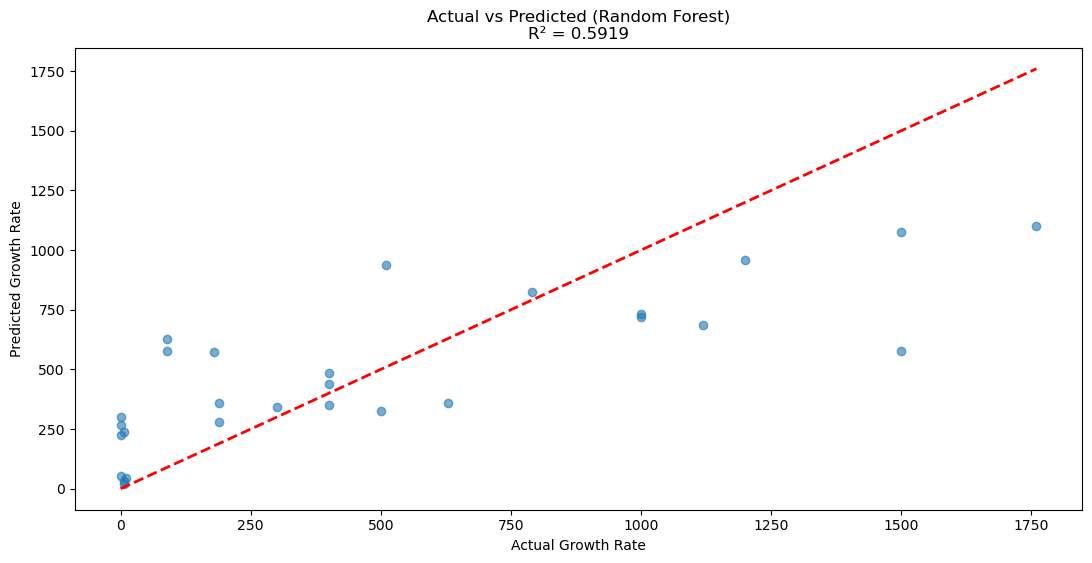

Best Model: Random Forest
Final R² Score: 0.5919 (59.19%)
Number of samples used: 140
Number of features: 9


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression

target_col = 'growth_rate_of_data_centers_percent_per_year'

if target_col in df.columns:
    print(f"Dataset shape: {df.shape}")
    features = ['total_data_centers',
                'floor_space_sqft_total',
                'power_capacity_MW_total',
                'average_renewable_energy_usage_percent',
                'internet_penetration_percent',
                'avg_latency_to_global_hubs_ms']
    
    model_df = df[available_features + [target_col]].copy()
    
    for col in available_features:
        if model_df[col].dtype in ['float64', 'int64']:
            model_df[col] = model_df[col].fillna(model_df[col].median())
    
    model_df = model_df.dropna(subset=[target_col])
    
    print(f"Dataset shape after cleaning: {model_df.shape}")
    
    # Remove outliers using IQR method
    def remove_outliers_iqr(df, column, factor=1.5):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    # Remove outliers from target variable
    original_size = len(model_df)
    model_df = remove_outliers_iqr(model_df, target_col)
    print(f"Removed {original_size - len(model_df)} outliers from target variable")
    
    X = model_df[available_features]
    y = model_df[target_col]
    
   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=None)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=available_features)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=available_features)
    
    selector = SelectKBest(score_func=f_regression, k='all')
    X_train_selected = selector.fit_transform(X_train_scaled, y_train)
    X_test_selected = selector.transform(X_test_scaled)
    
    selected_features = [available_features[i] for i in selector.get_support(indices=True)]
    
    models = {
        'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    }
    
    best_score = -float('inf')
    best_model = None
    best_name = None
    results = {}
    
    for name, model in models.items():
        model.fit(X_train_scaled, y_train)
        
        y_pred_train = model.predict(X_train_scaled)
        y_pred_test = model.predict(X_test_scaled)
        
        train_r2 = r2_score(y_train, y_pred_train)
        test_r2 = r2_score(y_test, y_pred_test)
        test_mse = mean_squared_error(y_test, y_pred_test)
        test_mae = mean_absolute_error(y_test, y_pred_test)
        
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
        
        results[name] = {
            'Train R²': train_r2,
            'Test R²': test_r2,
            'CV R² Mean': cv_scores.mean(),
            'CV R² Std': cv_scores.std()
        }
        
        print(f"\n{name}:")
        print(f"  Train R²: {train_r2:.4f}")
        print(f"  Test R²: {test_r2:.4f}")
        print(f"  CV R² (Mean ± Std): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
        
        if test_r2 > best_score:
            best_score = test_r2
            best_model = model
            best_name = name
    
    print(f"\nBest Model: {best_name} with R² = {best_score:.4f}")

    plt.figure(figsize=(13,6))
    
    y_pred_final = best_model.predict(X_test_scaled)
    plt.scatter(y_test, y_pred_final, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Growth Rate')
    plt.ylabel('Predicted Growth Rate')
    plt.title(f'Actual vs Predicted ({best_name})\nR² = {best_score:.4f}')
    plt.show()
    
    print(f"Best Model: {best_name}")
    print(f"Final R² Score: {best_score:.4f} ({best_score*100:.2f}%)")
    print(f"Number of samples used: {len(X)}")
    print(f"Number of features: {len(available_features)}")
    
else:
    print(f"Target column '{target_col}' not found in the dataframe.")
    print("Available columns:", df.columns.tolist())